# Shapefiles

The shapefiles are downloaded from OCHA (https://data.humdata.org/) website.

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors, patheffects
import seaborn as sns

In [2]:
# Set a value for the column width layout.
pd.options.display.max_colwidth = 20

In [3]:
# Set default sizes for figures.
plt.style.use("default") # style matplotlib
plt.rc("axes", labelsize = 15) # fontsize of the x and y labels
plt.rc("axes", titlesize = 15) # fontsize of the axes title
plt.rc("xtick", labelsize = 15) # fontsize of the tick labels
plt.rc("ytick", labelsize = 15) # fontsize of the tick labels
plt.rc("legend", fontsize = 15) # legend fontsize

In this notebook, we load the shapefiles representing the political boundaries of various countries.

In [4]:
# Define the path to the shapefile data released by OCHA.
PATH_TO_SHAPEFILES = "./OCHA_data/"
# Define the path where the results arising from this analysis will be saved.
PATH_TO_SAVE_DATA = "./output_shapefiles/"

## Yemen

### Administrative level 1

In [5]:
# Load OCHA file.
yemen = gpd.read_file(PATH_TO_SHAPEFILES + "Yemen/yem_admbnda_adm1_govyem_cso_20191002.shp")
yemen.head()

,ADM0_EN,ADM0_AR,ADM0_PCODE,ADM1_EN,ADM1_AR,ADM1_PCODE,ADM1REF_EN,ADM1ALT1AR,ADM1ALT1EN,ADM1ALT2AR,ADM1ALT2EN,date_,validOn,validTo,geometry
0,Yemen,اليمن,YE,Ibb,اب,YE11,Ibb,None,None,None,None,2019-02-01,2019-10-02,None,POLYGON ((44.080...
1,Yemen,اليمن,YE,Abyan,ابين,YE12,Abyan,None,None,None,None,2019-02-01,2019-10-02,None,POLYGON ((46.295...
2,Yemen,اليمن,YE,Sana'a City,امانة العاصمه,YE13,Sanaa City,None,None,None,None,2019-02-01,2019-10-02,None,POLYGON ((44.333...
3,Yemen,اليمن,YE,Al Bayda,البيضاء,YE14,Al Bayda,None,None,None,None,2019-02-01,2019-10-02,None,MULTIPOLYGON (((...
4,Yemen,اليمن,YE,Ta'iz,تعز,YE15,Taiz,None,None,None,None,2019-02-01,2019-10-02,None,MULTIPOLYGON (((...


In [6]:
yemen.ADM1_EN.unique()

array(['Ibb', 'Abyan', "Sana'a City", 'Al Bayda', "Ta'iz", 'Al Jawf',
       'Hajjah', 'Al Hodeidah', 'Hadramawt', 'Dhamar', 'Shabwah',
       "Sa'dah", "Sana'a", 'Aden', 'Lahj', "Ma'rib", 'Al Mahwit',
       'Al Maharah', 'Amran', "Ad Dali'", 'Raymah', 'Socotra'],
      dtype=object)

In [7]:
# Keep only 'geometry' and adminstratas information.
yemen = yemen[["ADM0_EN", "ADM1_EN", "geometry"]]
yemen.rename({"ADM0_EN": "country", "ADM1_EN": "region"}, axis = 1, inplace = True)

In [8]:
# Rename some regions.
yemen.region.replace({"Sana'a City": "Amanat Al Asimah", "Ta'iz": "Taizz", "Al Hodeidah": "Al Hudaydah", 
                      "Hadramawt": "Hadramaut", "Ma'rib": "Marib", "Ad Dali'": "Al Dhale'e", "Sa'dah": "Sa'ada"}, 
                     inplace = True)

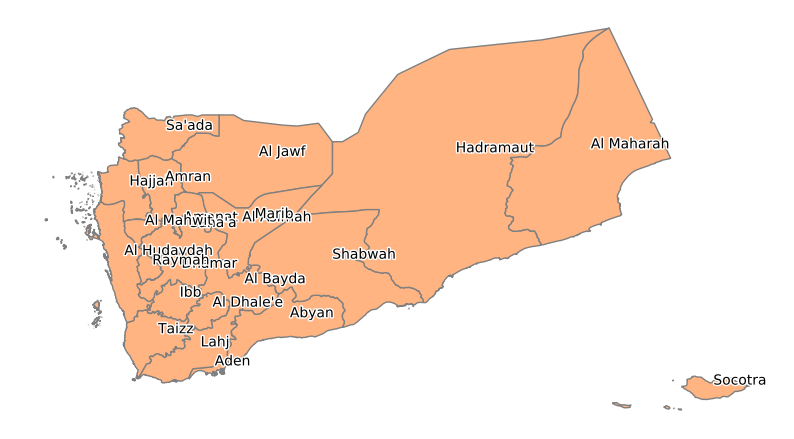

In [9]:
# Plot map.
fig, ax = plt.subplots(figsize = (10, 10))

yemen.plot(ax = ax, color = sns.color_palette("pastel")[1], edgecolor = "grey")
for x, y, label in zip(yemen.centroid.geometry.x, yemen.centroid.geometry.y, yemen["region"]):
    ax.annotate(label, xy = (x, y), xytext = (3, 3), textcoords = "offset points", 
                path_effects = [patheffects.withStroke(linewidth = 2, foreground = "w")])
    
ax.set_aspect("equal")
ax.axis("off");

In [10]:
# Save shapefile.
yemen.to_file(PATH_TO_SAVE_DATA + "Yemen/administrative_level_1/Yemen.shp")

## Burkina Faso

### Administrative level 1

In [11]:
# Load OCHA file.
burkina_faso = gpd.read_file(PATH_TO_SHAPEFILES + "Burkina Faso/bfa_admbnda_adm1_igb_20200323.shp")
burkina_faso.head()

,Shape_Leng,Shape_Area,ADM1_FR,ADM1_PCODE,ADM1_REF,ADM1ALT1FR,ADM1ALT2FR,ADM0_FR,ADM0_PCODE,date,validOn,validTo,geometry
0,12.979104,2.866733,Boucle du Mouhoun,BF46,None,None,None,Burkina Faso,BF,2020-03-18,2020-03-23,None,POLYGON ((-3.181...
1,9.431868,1.509470,Cascades,BF47,None,None,None,Burkina Faso,BF,2020-03-18,2020-03-23,None,POLYGON ((-5.389...
2,3.287168,0.248302,Centre,BF13,None,None,None,Burkina Faso,BF,2020-03-18,2020-03-23,None,POLYGON ((-1.605...
3,8.425414,1.201324,Centre-Est,BF48,None,None,None,Burkina Faso,BF,2020-03-18,2020-03-23,None,POLYGON ((-0.306...
4,7.905622,1.646603,Centre-Nord,BF49,None,None,None,Burkina Faso,BF,2020-03-18,2020-03-23,None,MULTIPOLYGON (((...


In [12]:
# Keep only 'geometry' and adminstratas information.
burkina_faso = burkina_faso[["ADM0_FR", "ADM1_FR", "geometry"]]
burkina_faso.rename({"ADM0_FR": "country", "ADM1_FR": "region"}, axis = 1, inplace = True)

In [13]:
# Rename some regions.
burkina_faso.region.replace(["Boucle du Mouhoun"], ["Boucle-Du-Mouhoun"], inplace = True)

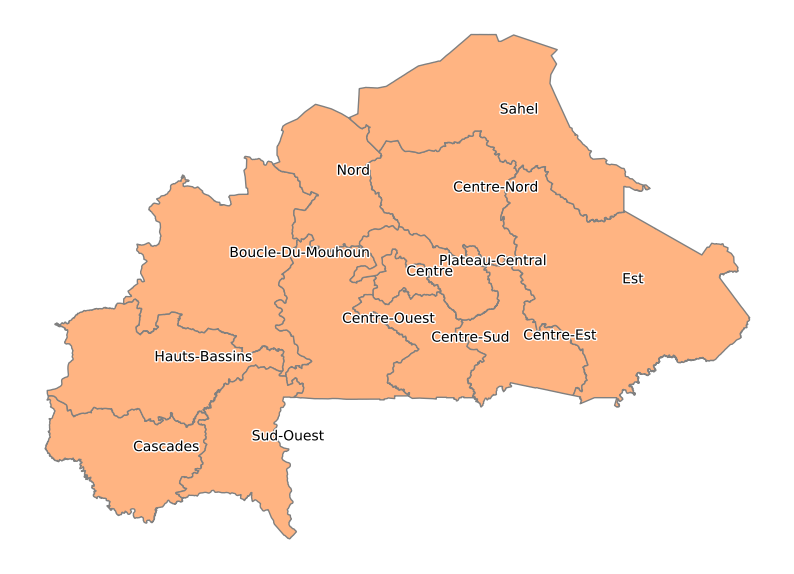

In [14]:
# Plot map.
fig, ax = plt.subplots(figsize = (10, 10))

burkina_faso.plot(ax = ax, color = sns.color_palette("pastel")[1], edgecolor = "grey")
for x, y, label in zip(burkina_faso.centroid.geometry.x, burkina_faso.centroid.geometry.y, burkina_faso["region"]):
    ax.annotate(label, xy = (x, y), xytext = (3, 3), textcoords = "offset points", 
                path_effects = [patheffects.withStroke(linewidth = 2, foreground = "w")])
    
ax.set_aspect("equal")
ax.axis("off");

In [15]:
# Save shapefile.
burkina_faso.to_file(PATH_TO_SAVE_DATA + "Burkina Faso/administrative_level_1/Burkina Faso.shp")

## Cameroon

### Administrative level 1

In [16]:
# Load OCHA file.
cameroon = gpd.read_file(PATH_TO_SHAPEFILES + "Cameroon/cmr_admbnda_adm1_inc_20180104.shp")
cameroon.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_FR,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1FR,ADM1ALT2FR,ADM0_EN,ADM0_FR,ADM0_PCODE,date,validOn,validTo,geometry
0,15.151424,5.235540,Adamawa,Adamaoua,CM001,None,None,None,None,None,Cameroon,Cameroun (le),CM,2018-12-17,2019-01-04,None,POLYGON ((12.288...
1,16.170961,5.601567,Centre,Centre,CM002,None,None,None,None,None,Cameroon,Cameroun (le),CM,2018-12-17,2019-01-04,None,POLYGON ((11.997...
2,18.826415,8.956520,East,Est,CM003,None,None,None,None,None,Cameroon,Cameroun (le),CM,2018-12-17,2019-01-04,None,POLYGON ((14.394...
3,13.272860,2.826867,Far-North,Extrême-Nord,CM004,None,None,None,None,None,Cameroon,Cameroun (le),CM,2018-12-17,2019-01-04,None,POLYGON ((14.537...
4,10.673468,1.646349,Littoral,Littoral,CM005,None,None,None,None,None,Cameroon,Cameroun (le),CM,2018-12-17,2019-01-04,None,POLYGON ((9.8478...


In [17]:
# Keep only 'geometry' and adminstratas information.
cameroon = cameroon[["ADM0_EN", "ADM1_EN", "geometry"]]
cameroon.rename({"ADM0_EN": "country", "ADM1_EN": "region"}, axis = 1, inplace = True)

In [18]:
# Rename some regions.
cameroon.region.replace(["Centre"], ["Central"], inplace = True)

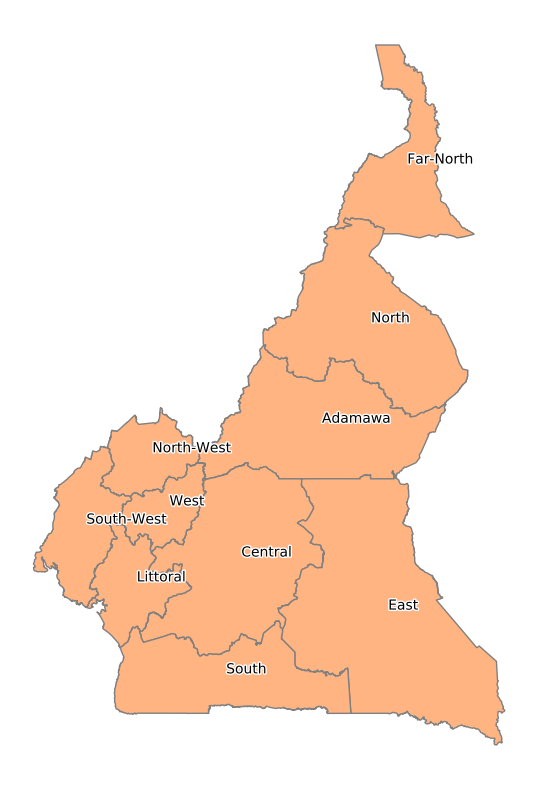

In [19]:
# Plot map.
fig, ax = plt.subplots(figsize = (10, 10))

cameroon.plot(ax = ax, color = sns.color_palette("pastel")[1], edgecolor = "grey")
for x, y, label in zip(cameroon.centroid.geometry.x, cameroon.centroid.geometry.y, cameroon["region"]):
    ax.annotate(label, xy = (x, y), xytext = (3, 3), textcoords = "offset points", 
                path_effects = [patheffects.withStroke(linewidth = 2, foreground = "w")])
    
ax.set_aspect("equal")
ax.axis("off");

In [20]:
# Save shapefile.
cameroon.to_file(PATH_TO_SAVE_DATA + "Cameroon/administrative_level_1/Cameroon.shp")

## Mali

### Administrative level 1

In [21]:
# Load OCHA file.
mali = gpd.read_file(PATH_TO_SHAPEFILES + "Mali/mli_admbnda_adm1_1m_dnct_20190802.shp")
mali.head()

,Shape_Leng,Shape_Area,ADM1_FR,ADM1_PCODE,ADM1_REF,ADM1ALT1FR,ADM1ALT2FR,ADM0_FR,ADM0_PCODE,date,validOn,validTo,geometry
0,0.751734,0.020439,Bamako,ML09,None,None,None,Mali (le),ML,2013-05-31,2019-08-02,None,POLYGON ((-7.929...
1,19.331703,15.140157,Gao,ML07,None,None,None,Mali (le),ML,2013-05-31,2019-08-02,None,POLYGON ((0.3757...
2,20.449044,10.250256,Kayes,ML01,None,None,None,Mali (le),ML,2013-05-31,2019-08-02,None,POLYGON ((-9.330...
3,18.857370,12.919863,Kidal,ML08,None,None,None,Mali (le),ML,2013-05-31,2019-08-02,None,POLYGON ((1.2012...
4,21.764713,7.563718,Koulikoro,ML02,None,None,None,Mali (le),ML,2013-05-31,2019-08-02,None,POLYGON ((-9.000...


In [22]:
# Keep only 'geometry' and adminstratas information.
mali = mali[["ADM1_FR", "geometry"]]
mali.rename({"ADM1_FR": "region"}, axis = 1, inplace = True)
mali["country"] = "Mali"

In [23]:
# Rename some regions.
mali.region.replace(["Ségou", "Gao", "Tombouctou"], ["Segou", "Gao-Menaka", "Tombouctou-Taoudeni"], inplace = True)

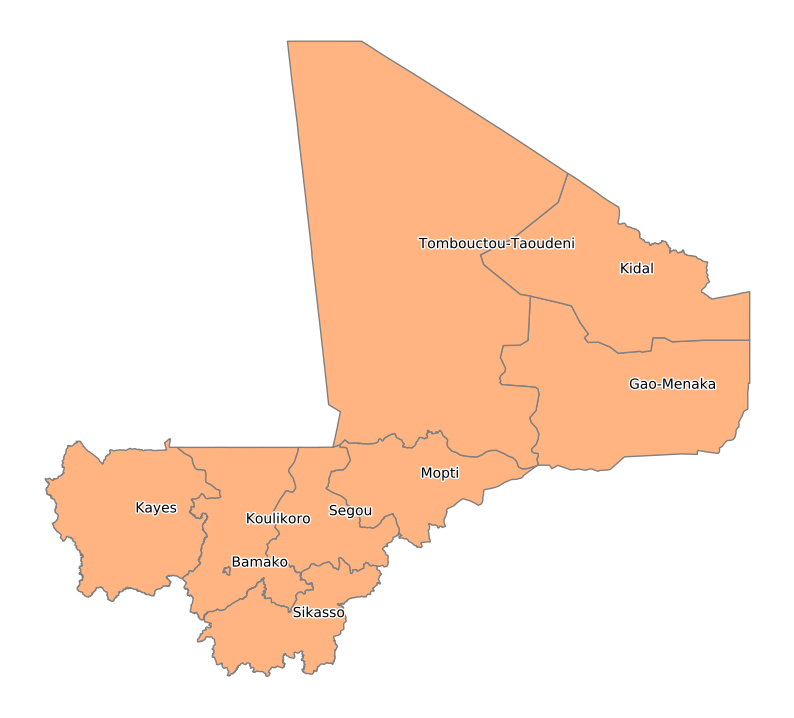

In [24]:
# Plot map.
fig, ax = plt.subplots(figsize = (10, 10))

mali.plot(ax = ax, color = sns.color_palette("pastel")[1], edgecolor = "grey")
for x, y, label in zip(mali.centroid.geometry.x, mali.centroid.geometry.y, mali["region"]):
    ax.annotate(label, xy = (x, y), xytext = (3, 3), textcoords = "offset points", 
                path_effects = [patheffects.withStroke(linewidth = 2, foreground = "w")])
    
ax.set_aspect("equal")
ax.axis("off");

In [25]:
# Save shapefile.
mali.to_file(PATH_TO_SAVE_DATA + "Mali/administrative_level_1/Mali.shp")

## Niger

### Administrative level 1

In [26]:
# Load OCHA file.
niger = gpd.read_file(PATH_TO_SHAPEFILES + "Niger/NER_adm01_feb2018.shp")
niger.head()

,OBJECTID,adm_01,Shape_Leng,Shape_Area,rowcacode1,NOMREG,ISO3,ISO2,geometry
0,1,Agadez,32.960455,53.547633,NER001,AGADEZ,NER,NE,POLYGON ((11.989...
1,2,Diffa,18.408306,12.306259,NER002,DIFFA,NER,NE,POLYGON ((15.559...
2,3,Dosso,8.965807,2.617021,NER003,DOSSO,NER,NE,POLYGON ((3.6684...
3,4,Maradi,8.531121,3.293766,NER004,MARADI,NER,NE,POLYGON ((7.7694...
4,5,Niamey,1.068639,0.046497,NER008,NIAMEY,NER,NE,POLYGON ((2.0944...


In [27]:
# Keep only 'geometry' and adminstratas information.
niger = niger[["adm_01", "geometry"]]
niger.rename({"adm_01": "region"}, axis = 1, inplace = True)
niger["country"] = "Niger"

In [28]:
# Rename some regions.
niger.region.replace(["Tillabéri"], ["Tillaberi"], inplace = True)

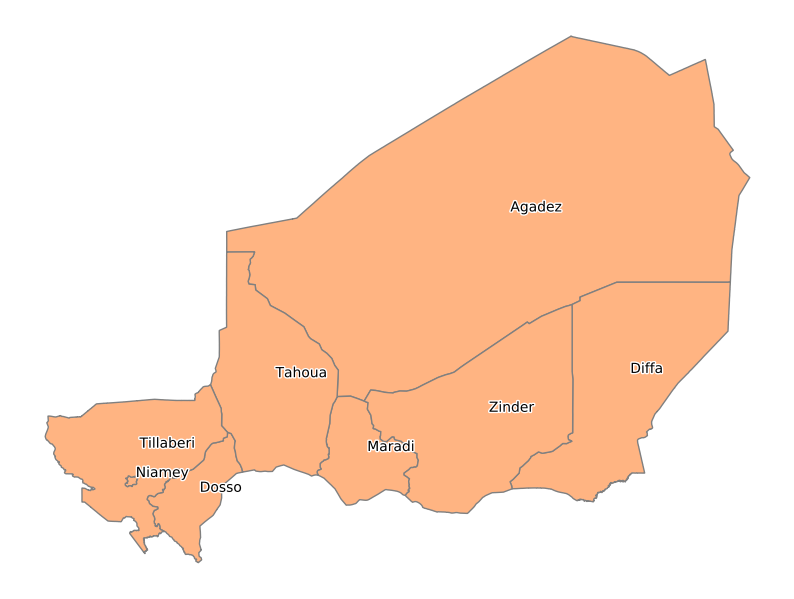

In [29]:
# Plot map.
fig, ax = plt.subplots(figsize = (10, 10))

niger.plot(ax = ax, color = sns.color_palette("pastel")[1], edgecolor = "grey")
for x, y, label in zip(niger.centroid.geometry.x, niger.centroid.geometry.y, niger["region"]):
    ax.annotate(label, xy = (x, y), xytext = (3, 3), textcoords = "offset points", 
                path_effects = [patheffects.withStroke(linewidth = 2, foreground = "w")])
    
ax.set_aspect("equal")
ax.axis("off");

In [30]:
# Save shapefile.
niger.to_file(PATH_TO_SAVE_DATA + "Niger/administrative_level_1/Niger.shp")

## Nigeria

### Administrative level 1

In [31]:
# Load OCHA file.
nigeria = gpd.read_file(PATH_TO_SHAPEFILES + "Nigeria/nga_admbnda_adm1_osgof_20190417.shp")
nigeria.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,4.695135,0.396543,Abia,NG001,Abia,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,POLYGON ((7.3868...
1,11.525443,3.113007,Adamawa,NG002,Adamawa,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,POLYGON ((13.621...
2,5.263830,0.549476,Akwa Ibom,NG003,Akwa Ibom,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,MULTIPOLYGON (((...
3,3.595960,0.392661,Anambra,NG004,Anambra,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,POLYGON ((6.9325...
4,13.952005,4.011018,Bauchi,NG005,Bauchi,None,None,Nigeria,NG,2016-11-29,2019-04-17,None,POLYGON ((10.751...


In [32]:
# Keep only 'geometry' and adminstratas information.
nigeria = nigeria[["ADM0_EN", "ADM1_EN", "geometry"]]
nigeria.rename({"ADM0_EN": "country", "ADM1_EN": "region"}, axis = 1, inplace = True)

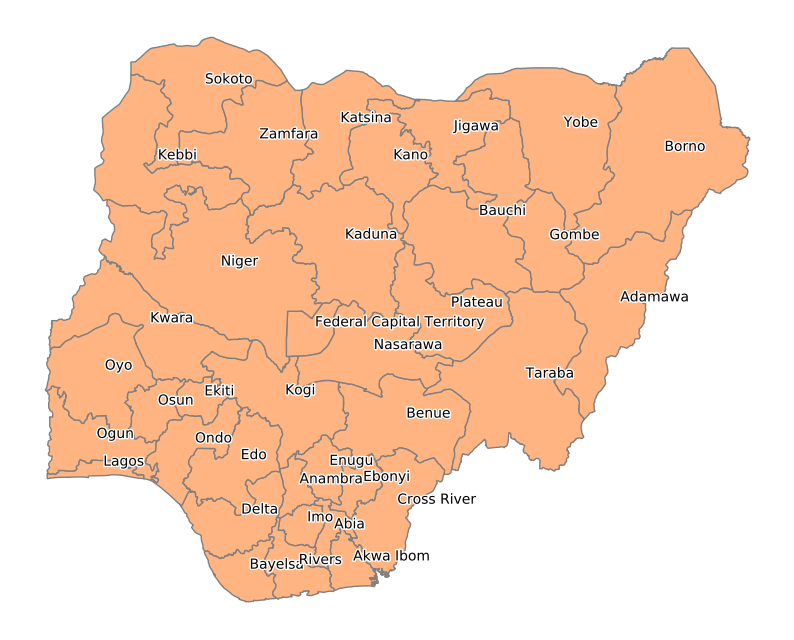

In [33]:
# Plot map.
fig, ax = plt.subplots(figsize = (10, 10))

nigeria.plot(ax = ax, color = sns.color_palette("pastel")[1], edgecolor = "grey")
for x, y, label in zip(nigeria.centroid.geometry.x, nigeria.centroid.geometry.y, nigeria["region"]):
    ax.annotate(label, xy = (x, y), xytext = (3, 3), textcoords = "offset points", 
                path_effects = [patheffects.withStroke(linewidth = 2, foreground = "w")])
    
ax.set_aspect("equal")
ax.axis("off");

In [34]:
# Save shapefile.
nigeria.to_file(PATH_TO_SAVE_DATA + "Nigeria/administrative_level_1/Nigeria.shp")

## Syria

### Administrative level 1

In [35]:
# Load OCHA file.
syria = gpd.read_file(PATH_TO_SHAPEFILES + "Syria/syr_admbnda_adm1_uncs_unocha_20201217.shp")
syria.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_AR,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1AR,ADM1ALT2AR,ADM0_EN,ADM0_AR,ADM0_PCODE,date,validOn,validTo,geometry
0,7.896684,2.330266,Al-Hasakeh,الحسكة,SY08,None,None,None,None,None,Syrian Arab Repu...,الجمهورية العربي...,SY,2017-06-01,2020-12-17,None,POLYGON ((42.226...
1,9.302662,1.993687,Aleppo,حلب,SY02,None,None,None,None,None,Syrian Arab Repu...,الجمهورية العربي...,SY,2017-06-01,2020-12-17,None,POLYGON ((38.296...
2,7.030809,1.762222,Ar-Raqqa,الرقة,SY11,None,None,None,None,None,Syrian Arab Repu...,الجمهورية العربي...,SY,2017-06-01,2020-12-17,None,POLYGON ((38.795...
3,3.511850,0.611739,As-Sweida,السويداء,SY13,None,None,None,None,None,Syrian Arab Repu...,الجمهورية العربي...,SY,2017-06-01,2020-12-17,None,POLYGON ((36.884...
4,0.608190,0.011323,Damascus,دمشق,SY01,None,None,None,None,None,Syrian Arab Repu...,الجمهورية العربي...,SY,2017-06-01,2020-12-17,None,POLYGON ((36.325...


In [36]:
# Keep only 'geometry' and adminstratas information.
syria = syria[["ADM1_EN", "geometry"]]
syria.rename({"ADM1_EN": "region"}, axis = 1, inplace = True)
syria["country"] = "Syria"

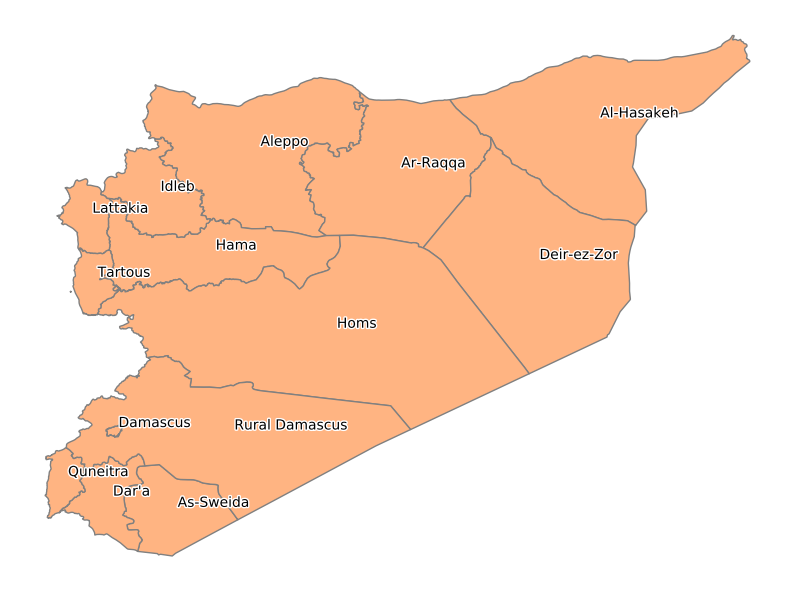

In [37]:
# Plot map.
fig, ax = plt.subplots(figsize = (10, 10))

syria.plot(ax = ax, color = sns.color_palette("pastel")[1], edgecolor = "grey")
for x, y, label in zip(syria.centroid.geometry.x, syria.centroid.geometry.y, syria["region"]):
    ax.annotate(label, xy = (x, y), xytext = (3, 3), textcoords = "offset points", 
                path_effects = [patheffects.withStroke(linewidth = 2, foreground = "w")])
    
ax.set_aspect("equal")
ax.axis("off");

In [38]:
# Save shapefile.
syria.to_file(PATH_TO_SAVE_DATA + "Syria/administrative_level_1/Syria.shp")

# Map world

In [39]:
# Define the adminstatas to color into the map.
adminstratas = {"Yemen": ['Al Hudaydah', 'Al Jawf', 'Al Maharah', 'Al Mahwit', 'Amanat Al Asimah', 'Amran', 'Dhamar','Hajjah',
                          'Ibb', 'Lahj', 'Marib', 'Raymah', "Sa'ada", "Sana'a", 'Shabwah', 'Taizz', 'Abyan', 'Aden', 'Al Bayda',
                          "Al Dhale'e"], 
                "Syria": ['Tartous', 'Al-Hasakeh', 'Aleppo', 'As-Sweida', 'Damascus', "Dar'a", 'Hama', 'Homs', 'Lattakia', 'Rural Damascus', 'Ar-Raqqa',
                          'Deir-ez-Zor'], 
                "Burkina Faso": ['Centre', 'Centre-Sud', 'Plateau-Central', 'Centre-Est', 'Est', 'Sahel', 'Boucle-Du-Mouhoun', 
                                 'Centre-Nord', 'Hauts-Bassins', 'Sud-Ouest', 'Cascades', 'Centre-Ouest', 'Nord'], 
                "Nigeria": ['Adamawa', 'Borno', 'Yobe'], 
                "Cameroon": ['South-West', 'Adamawa', 'Central', 'East', 'Far-North', 'Littoral', 'North', 'West', 'North-West'], 
                "Mali": ['Mopti', 'Segou', 'Tombouctou-Taoudeni', 'Bamako', 'Kayes', 'Koulikoro', 'Sikasso']}

In [40]:
# Define world and countries geopandas dataframe.
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries = pd.concat([mali, yemen, syria, nigeria, cameroon, burkina_faso])

# Draw only the selected provinces for each country.
countries["draw"] = countries.apply(lambda x: 1 if x["region"] in adminstratas[x["country"]] else np.nan, axis = 1)
countries.head()

,region,geometry,country,draw
0,Bamako,POLYGON ((-7.929...,Mali,1.0
1,Gao-Menaka,POLYGON ((0.3757...,Mali,NaN
2,Kayes,POLYGON ((-9.330...,Mali,1.0
3,Kidal,POLYGON ((1.2012...,Mali,NaN
4,Koulikoro,POLYGON ((-9.000...,Mali,1.0


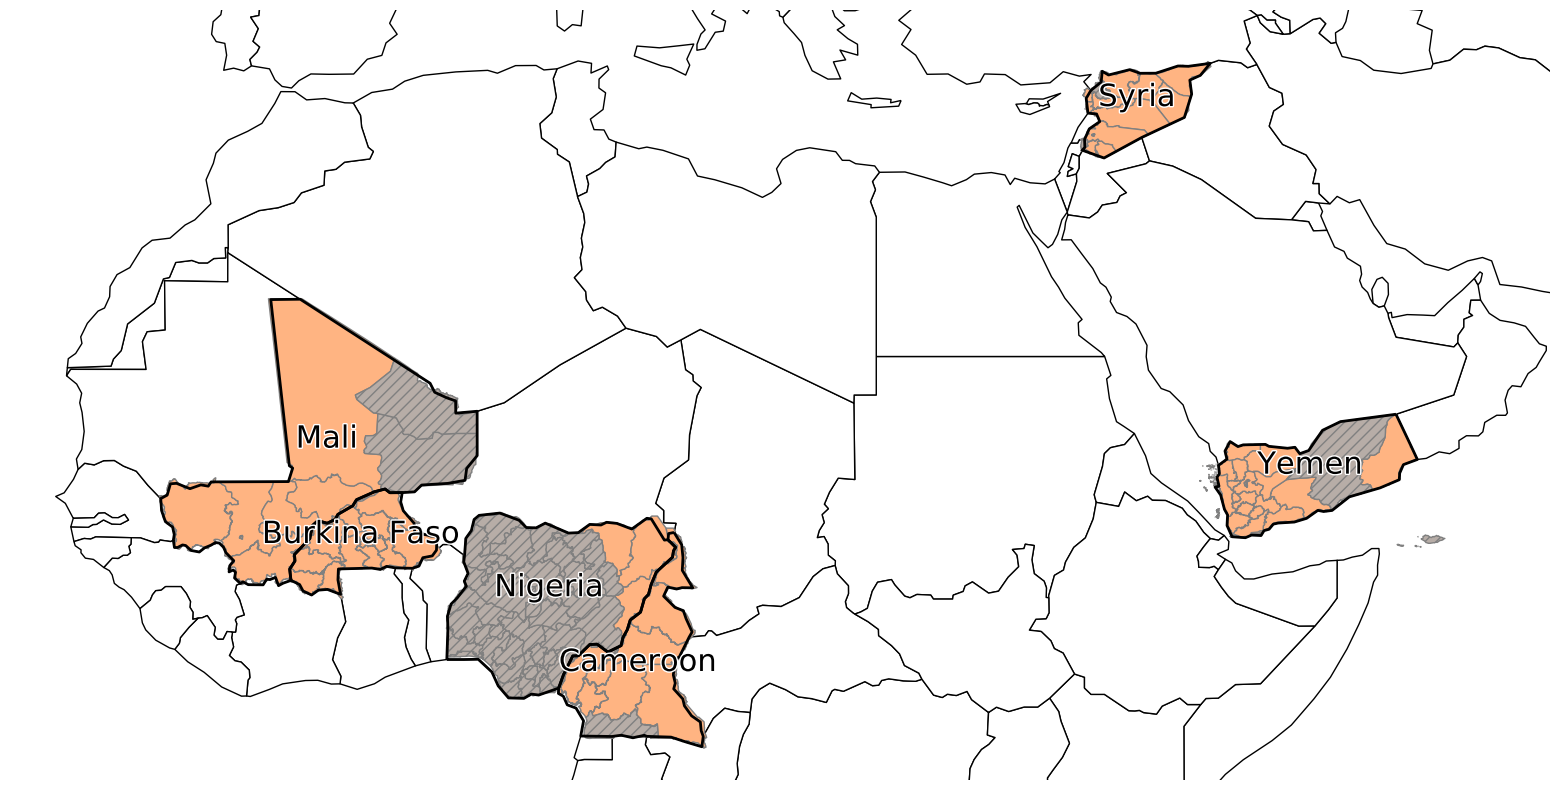

In [41]:
fig, ax = plt.subplots(figsize = (30, 10))
# Create custom cmap.
cmap = colors.ListedColormap([sns.color_palette("pastel")[1]])

world.plot(ax = ax, color = "white", edgecolor = "black")
countries.plot(column = "draw", ax = ax, cmap = cmap, edgecolor = "grey", legend = False, alpha = 1.,
               missing_kwds = {"color": "#b7ada7", "edgecolor": "grey", "hatch": "///", "label": "Missing values"})

boundaries = world[world.name.isin(["Yemen", "Nigeria", "Syria", "Cameroon", "Mali", "Burkina Faso"])]
boundaries.plot(ax = ax, color = "None", edgecolor = "black", linewidth = 2)

for x, y, label in zip(boundaries.centroid.geometry.x, boundaries.centroid.geometry.y, boundaries["name"]):
    ax.text(x, y, label, ha = "center", size = 22, path_effects = [patheffects.withStroke(linewidth = 2, foreground = "w")])

ax.axis([-20, 60, 0, 40])
ax.set_aspect("equal")
ax.axis("off")

fig.savefig("world.png", dpi = 300, bbox_inches = "tight")